In [1]:
from reader import Reader
import yaml
from const import Const
import random
import numpy as np
from utils import get_F_example
from clustering import Clusters
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
reader = Reader()

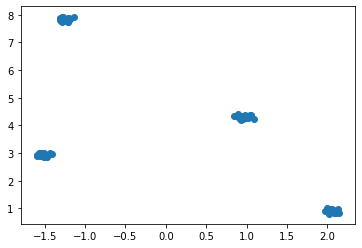

In [32]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [33]:
ids = [i+1 for i in range(len(X))]

In [34]:
df = pd.DataFrame()

In [35]:
df['id'] = ids
df['X1'] = X[:,0]
df['X2'] = X[:,1]

In [36]:
df = reader.read('input.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'input.xlsx'

In [37]:
const = Const()

C:\Users\nekro\Documents\Cluster\git\clus\clusters\const.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.config = yaml.load(open("settings.yaml", 'r'))


In [38]:
const.norm(df)

In [39]:
const.calculate_a(df, type_of_optimization=2)

In [40]:
const.config

{'conturs': {'min_points': 30,
  'contour_points': 50,
  'min_diff': 1.35,
  'num_of_lenghts': 4},
 'isolated_cluster': {'constU1': 0.05,
  'min_len': 0.61,
  'min_dif': 1.35,
  'divider': 2,
  'max_div_num': 8},
 'knots': {'min_fuses_num': 15, 'stop_const': 0.61},
 'consts': {'round_const': 2,
  'const': 0.25,
  'percent_X': 20,
  'down_steps': 4,
  'up_steps': 6,
  'power_koef': 1.16,
  'percent_Y': 33,
  'threshold': 0.8,
  'Y_step': 2.5,
  'a': 0.6054023141467939}}

In [41]:
X = df.iloc[:].values
F = np.array(get_F_example(X, const.config['consts']['a']))[:,-1]
df['F'] = F
df

,id,X1,X2,F
0,1,31.145505,133.573505,5.714996
1,2,-43.010002,246.985568,6.596055
2,3,33.228757,135.622548,6.876031
3,4,32.235994,136.026104,10.486646
4,5,33.997383,137.322923,5.138309
5,6,31.347760,134.955464,8.332992
6,7,-51.431397,94.824883,5.327662
7,8,-39.337198,246.703145,7.494893
8,9,29.187359,138.500444,3.897021
9,10,-41.497041,246.188754,7.325921


Researching dataset

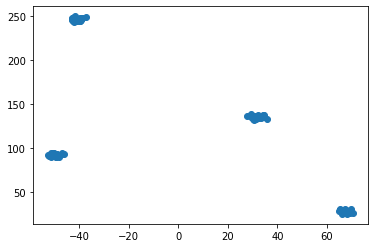

In [42]:
plt.scatter(df['X1'], df['X2'])

In [43]:
cluster = Clusters(const.config)

In [44]:
out_clusters = cluster.get_isolated_clusters(df)

In [45]:
len(out_clusters)

10

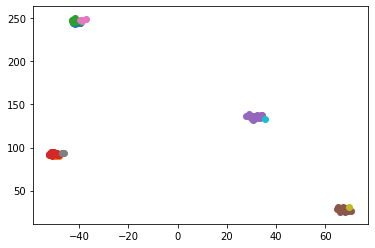

In [46]:
dfs = []
for cluster in out_clusters:
    dfs.append(pd.DataFrame(cluster))
for df in dfs:
    plt.scatter(df[1], df[2])

In [ ]:
out_clusters

In [ ]:
def save_array(data, header, fmt, filename, delimiter=','):
    if filename.endswith('csv') or filename.endswith('txt'):
        np.savetxt(filename, data, fmt=fmt, header=header)

In [ ]:
result = []
for i in range(len(out_clusters)):
    for point in out_clusters[i]:
        result.append(np.append(point, i))

header = str(['Id'] + ['X{}'.format(i+1) for i in range(len(result[0])-3)] + ['F'] + ['Cluster_id'])[1:-1]
fmt = str(['%i'] + ['%1.6f' for c in result[0][2:-1]] + ['%1.6f', '%i'])[1:-1].replace("'", '')
out_file = 'output.csv'
save_array(result, header, fmt, out_file)

In [ ]:
result